<a href="https://colab.research.google.com/github/bhuvanesh-ctrl/datamining/blob/main/datamining_assignment1_Bhuvanesh_Chandrashekharkorlahalli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANALYSIS OF USED CAR DATASET**


IMPORTING NECESSARY LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import StandardScaler

READING THE FILE BEFORE FURTHER ANALYSIS. THERE ARE 14 COLUMNS AND OVER 7000 RECORDS IN THIS DATASET.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/3rd sem /data mining - Taehee Jeong /used_cars_data.csv")
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [ ]:
#DROPPING THE COLUMNS AS PER INSTRUCTIONS GIVEN.
df = df.drop(['S.No.','New_Price'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 680.1+ KB


**1. (3 pts) Transformation
Among the columns in the dataset, the datatype of the ‘Mileage’, ‘Engine’, ‘Power’ columns is ‘object’. Please
convert them to numerical columns (float or integer). This may involve performing unit conversions to achieve
consistency within each column.**

In [ ]:
# split the Name column into two columns. This helps us understand the different units used by the source while recording this dataset.
df[['mileage_value', 'mileage unit']] = df['Mileage'].str.split(' ', expand=True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,mileage_value,mileage unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,26.6,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,19.67,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,18.2,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,20.77,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,15.2,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,20.54,kmpl
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,17.21,kmpl
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,23.08,kmpl
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,17.2,kmpl


In [ ]:
#using value_counts() function on mileage unit column to understand the units.
df.value_counts(df['mileage unit'])

mileage unit
kmpl     7177
km/kg      74
dtype: int64

In [ ]:
df.Mileage

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
7248    20.54 kmpl
7249    17.21 kmpl
7250    23.08 kmpl
7251     17.2 kmpl
7252     10.0 kmpl
Name: Mileage, Length: 7253, dtype: object

In [ ]:
#function to convert km/kg to kmpl.
def convert_to_kmpl(mileage):
    if isinstance(mileage, str) and 'km/kg' in mileage:
        km_per_kg = float(mileage.split()[0])
        # 1 km/kg = 0.425 kmpl
        kmpl = km_per_kg * 0.425
        return f"{kmpl:.2f} kmpl"
    else:
        return mileage

# Apply the conversion function to the Mileage column
df['Mileage'] = df['Mileage'].apply(convert_to_kmpl)

df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,mileage_value,mileage unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,11.30 kmpl,998 CC,58.16 bhp,5.0,1.75,26.6,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,19.67,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,18.2,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,20.77,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,15.2,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,20.54,kmpl
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,17.21,kmpl
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,23.08,kmpl
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,17.2,kmpl


In [ ]:
#converting object datatype column to numerical.
def convert_to_numerical_mileage(mileage):
    if isinstance(mileage, str):
        # Remove ' kmpl' or ' km/kg' from the string
        mileage_value = float(mileage.split()[0])
        return mileage_value
    else:
        # If already numerical, return as it is
        return mileage

# Apply the conversion function to the Mileage column
df['Mileage'] = df['Mileage'].apply(convert_to_numerical_mileage)

df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,mileage_value,mileage unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,11.30,998 CC,58.16 bhp,5.0,1.75,26.6,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50,19.67,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,4.50,18.2,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00,20.77,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,17.74,15.2,kmpl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598 CC,103.6 bhp,5.0,NaN,20.54,kmpl
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197 CC,103.6 bhp,5.0,NaN,17.21,kmpl
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461 CC,63.1 bhp,5.0,NaN,23.08,kmpl
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197 CC,103.6 bhp,5.0,NaN,17.2,kmpl


In [ ]:
df = df.drop(['mileage_value', 'mileage unit'],axis=1)

In [ ]:
#redoing the same split to understand the unit distribution.
df[['engine_value','engine_unit']] = df['Engine'].str.split(' ',expand=True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,engine_value,engine_unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,11.30,998 CC,58.16 bhp,5.0,1.75,998,CC
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50,1582,CC
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,4.50,1199,CC
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00,1248,CC
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,17.74,1968,CC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598 CC,103.6 bhp,5.0,NaN,1598,CC
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197 CC,103.6 bhp,5.0,NaN,1197,CC
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461 CC,63.1 bhp,5.0,NaN,1461,CC
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197 CC,103.6 bhp,5.0,NaN,1197,CC


In [ ]:
df.value_counts('engine_unit')

engine_unit
CC    7207
dtype: int64

In [ ]:

def convert_to_numerical_engine(engine):
    if isinstance(engine, str):
        # Remove 'CC' from the string
        engine_value = float(engine.split()[0])
        return engine_value
    else:
        # If already numerical, return as it is
        return engine

# Apply the conversion function to the Mileage column
df['Engine'] = df['Engine'].apply(convert_to_numerical_engine)

df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,engine_value,engine_unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,11.30,998.0,58.16 bhp,5.0,1.75,998,CC
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,12.50,1582,CC
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,4.50,1199,CC
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,6.00,1248,CC
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,17.74,1968,CC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6 bhp,5.0,NaN,1598,CC
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6 bhp,5.0,NaN,1197,CC
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1 bhp,5.0,NaN,1461,CC
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6 bhp,5.0,NaN,1197,CC


In [ ]:
df = df.drop(['engine_value','engine_unit'], axis=1)

In [ ]:
#similar step implemented to understand the unit distribution in power column.
df[['power_value','power_unit']] = df['Power'].str.split(' ', expand = True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,power_value,power_unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,11.30,998.0,58.16 bhp,5.0,1.75,58.16,bhp
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2 bhp,5.0,12.50,126.2,bhp
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7 bhp,5.0,4.50,88.7,bhp
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76 bhp,7.0,6.00,88.76,bhp
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8 bhp,5.0,17.74,140.8,bhp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6 bhp,5.0,NaN,103.6,bhp
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6 bhp,5.0,NaN,103.6,bhp
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1 bhp,5.0,NaN,63.1,bhp
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6 bhp,5.0,NaN,103.6,bhp


In [ ]:
df['Power']

0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
7248    103.6 bhp
7249    103.6 bhp
7250     63.1 bhp
7251    103.6 bhp
7252      170 bhp
Name: Power, Length: 7253, dtype: object

In [ ]:
#finding null values in power as converting the column from null object type nulll values
df['Power'].isnull().sum()

46

In [ ]:
# Function to convert power string to numerical value
def convert_to_numerical_power(power):
    if isinstance(power, str):
        # Replace 'null' with NaN
        power = power.replace('null', 'NaN')
        # Remove ' bhp' from the string and convert to float
        power_value = float(power.split()[0])
        return power_value
    else:
        return np.nan

# Apply the conversion function to the Power column
df['Power'] = df['Power'].apply(convert_to_numerical_power)

df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,power_value,power_unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,11.30,998.0,58.16,5.0,1.75,58.16,bhp
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,126.2,bhp
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,88.7,bhp
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,88.76,bhp
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,140.8,bhp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,103.6,bhp
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,103.6,bhp
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,63.1,bhp
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,103.6,bhp


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
 12  power_value        7207 non-null   object 
 13  power_unit         7207 non-null   object 
dtypes: float64(5), int64(2), object(7)
memory usage: 793.4+ KB


In [ ]:
df = df.drop(['power_value','power_unit'],axis=1)

In [ ]:
df.rename(columns = {'Engine':'Engine_in_CC','Mileage':'Mileage_in_kmpl','Power':'Power_in_bhp'},inplace=True)
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage_in_kmpl', 'Engine_in_CC',
       'Power_in_bhp', 'Seats', 'Price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage_in_kmpl    7251 non-null   float64
 8   Engine_in_CC       7207 non-null   float64
 9   Power_in_bhp       7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 680.1+ KB


In [ ]:
df.describe()

,Year,Kilometers_Driven,Mileage_in_kmpl,Engine_in_CC,Power_in_bhp,Seats,Price
count,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,6019.000000
mean,2013.365366,5.869906e+04,17.998669,1616.573470,112.765214,5.279722,9.479468
std,3.254421,8.442772e+04,4.545639,595.285137,53.493553,0.811660,11.187917
min,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.100000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.341600e+04,18.060000,1493.000000,94.000000,5.000000,5.640000
75%,2016.000000,7.300000e+04,20.920000,1968.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,28.400000,5998.000000,616.000000,10.000000,160.000000


**2) Please check and print outliers based on IQR and draw box-plots accordingly for the following columns:
‘Car_Age’, ‘Kilometers_Driven’, ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’. When printing the outliers,
please print the number of outliers in each column, and the number of records with at least one outlier. (2pts)**

In [ ]:
# Function to calculate car age
def calculate_car_age(row):
    current_year = datetime.datetime.now().year
    return current_year - row['Year']

# Apply the function to calculate car age
df['Car_Age'] = df.apply(lambda row: calculate_car_age(row), axis=1)

df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_in_kmpl,Engine_in_CC,Power_in_bhp,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,11.30,998.0,58.16,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,13
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,9
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,12
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,11


In [ ]:
df['Seats'].value_counts()

5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64

Data imputation for the "seats" column is done here, as it is categorical column I have imputed the data set with the mode of that column that is **5**. This imputation is done to show that a car with 0 seats doesn't make sense.  Further missing value imputation will be done below.

In [ ]:
seat_mode = df['Seats'].mode()
df.loc[df['Seats'] == 0, 'Seats'] = seat_mode
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_in_kmpl,Engine_in_CC,Power_in_bhp,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,11.30,998.0,58.16,5.0,1.75,14
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,13
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,12
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,13
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,9
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,12
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,11


In [ ]:
df['Seats'].value_counts()

5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
Name: Seats, dtype: int64

Q1: 8.0
Q3: 13.0
lower bound: 0.5
min of column: 5
upper bound: 20.5
max of column: 28
new lower bound 5


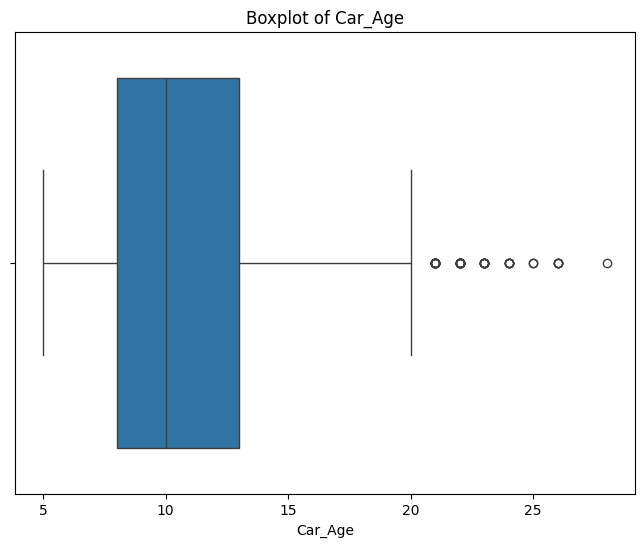

Outliers in Car_Age:
274     22
315     24
364     21
613     24
631     22
911     21
1221    21
1224    25
1318    22
1845    25
1903    22
1907    22
1999    23
2487    21
2524    21
2554    22
2656    22
2737    23
3138    26
3189    22
3221    22
3228    21
3749    26
3806    23
3854    21
3942    22
3963    23
4143    21
4152    21
4351    21
4629    23
4658    21
4709    26
4712    21
4730    21
4791    21
4822    22
4863    23
5040    21
5137    24
5270    22
5432    22
5453    23
5643    21
5647    23
5657    22
5716    26
5914    21
5926    24
5943    22
6194    21
6216    28
6454    22
6576    22
6753    24
6875    22
6986    21
7138    21
Name: Car_Age, dtype: int64


Q1: 34000.0
Q3: 73000.0
lower bound: -24500.0
min of column: 171
upper bound: 131500.0
max of column: 6500000
new lower bound 171


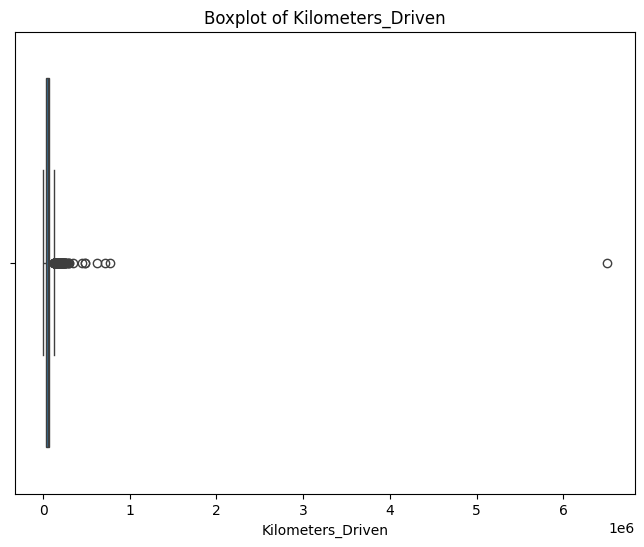

Outliers in Kilometers_Driven:
29      262000
64      178000
77      230000
154     136997
164     147898
         ...  
7183    137711
7198    147202
7200    190000
7213    170000
7227    160000
Name: Kilometers_Driven, Length: 258, dtype: int64


Q1: 15.1
Q3: 20.92
lower bound: 6.369999999999996
min of column: 0.0
upper bound: 29.650000000000006
max of column: 28.4
new upper bound: 28.4


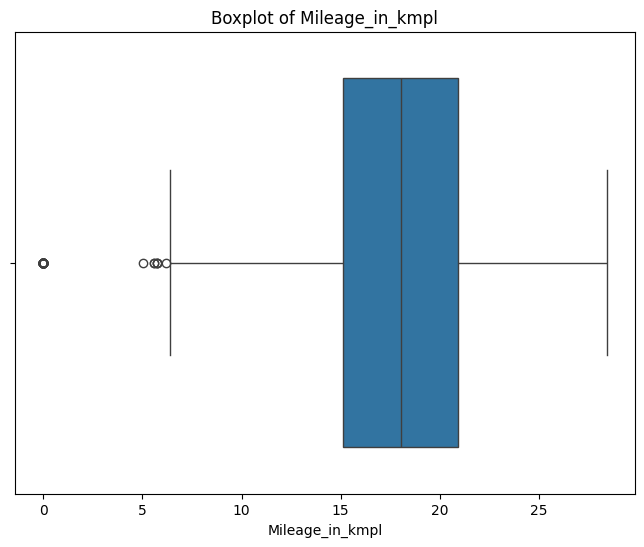

Outliers in Mileage_in_kmpl:
14      0.00
67      0.00
79      0.00
194     0.00
229     0.00
        ... 
6697    0.00
6857    0.00
6918    5.61
6957    0.00
7226    0.00
Name: Mileage_in_kmpl, Length: 88, dtype: float64


Q1: 1198.0
Q3: 1968.0
lower bound: 43.0
min of column: 72.0
upper bound: 3123.0
max of column: 5998.0
new lower bound 72.0


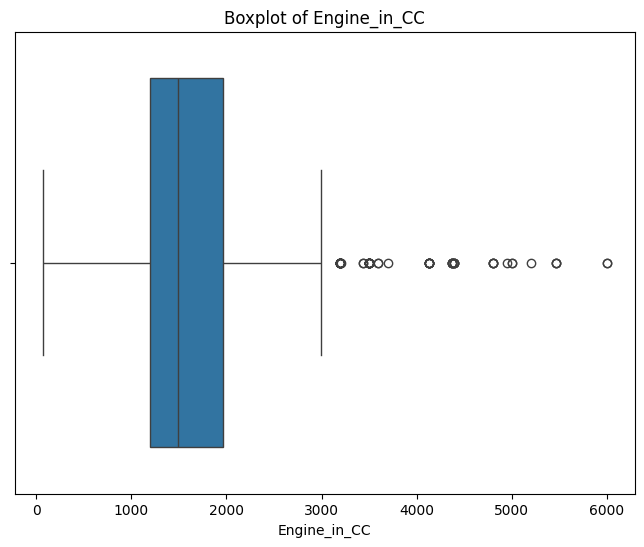

Outliers in Engine_in_CC:
70      4806.0
152     5461.0
459     4134.0
586     4134.0
589     3498.0
         ...  
6011    3597.0
6186    3498.0
6354    5998.0
6842    3696.0
7057    4395.0
Name: Engine_in_CC, Length: 65, dtype: float64


Q1: 75.0
Q3: 138.1
lower bound: -19.64999999999999
min of column: 34.2
upper bound: 232.75
max of column: 616.0
new lower bound 34.2


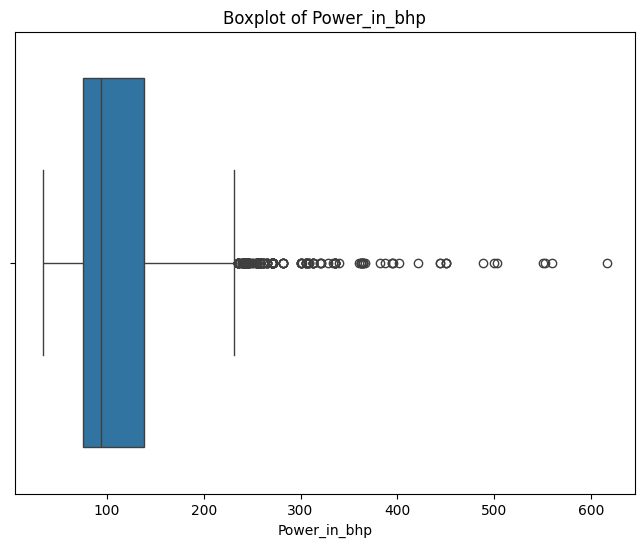

Outliers in Power_in_bhp:
38      254.80
70      500.00
103     241.40
107     270.90
134     362.07
         ...  
7117    360.00
7124    236.00
7156    321.00
7198    241.60
7216    258.00
Name: Power_in_bhp, Length: 273, dtype: float64


Q1: 5.0
Q3: 5.0
lower bound: 5.0
min of column: 2.0
upper bound: 5.0
max of column: 10.0


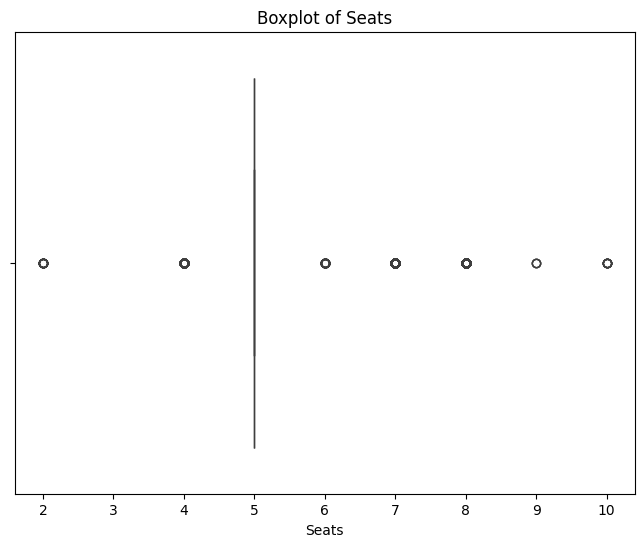

Outliers in Seats:
0       5.0
1       5.0
2       5.0
3       7.0
4       5.0
       ... 
7248    5.0
7249    5.0
7250    5.0
7251    5.0
7252    5.0
Name: Seats, Length: 7199, dtype: float64


Q1: 3.5
Q3: 9.95
lower bound: -6.174999999999999
min of column: 0.44
upper bound: 19.625
max of column: 160.0
new lower bound 0.44


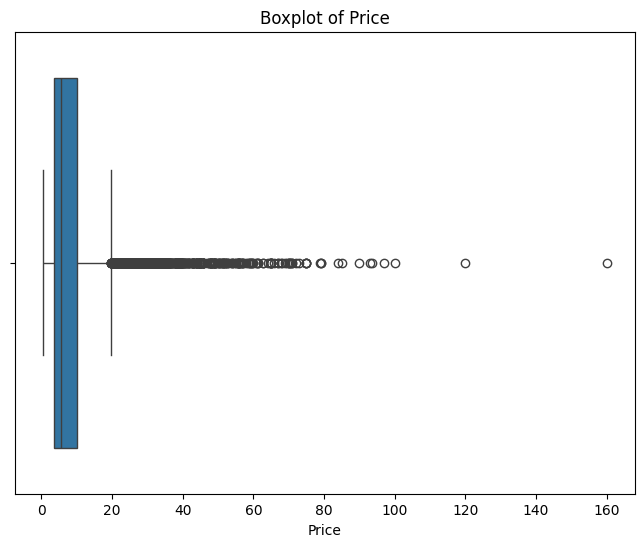

Outliers in Price:
13      27.00
19      28.00
22      23.50
38      28.00
50      21.43
        ...  
5950    21.75
5970    26.76
5996    30.54
6008    45.00
6009    19.75
Name: Price, Length: 718, dtype: float64


Summary:
Number of records with at least one outlier: 7
Number of outliers in each column:
{'Car_Age': 58, 'Kilometers_Driven': 258, 'Mileage_in_kmpl': 88, 'Engine_in_CC': 65, 'Power_in_bhp': 273, 'Seats': 7199, 'Price': 718}


In [ ]:
columns_of_interest = ['Car_Age', 'Kilometers_Driven', 'Mileage_in_kmpl', 'Engine_in_CC', 'Power_in_bhp', 'Seats', 'Price']

# Function to detect outliers based on IQR
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    print("Q1:",Q1)
    Q3 = column.quantile(0.75)
    print("Q3:",Q3)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    print("lower bound:",lower_bound)
    print("min of column:",min(column))
    upper_bound = Q3 + 1.5 * IQR
    print("upper bound:",upper_bound)
    print("max of column:",max(column)) #checking for boundary conditions
    if lower_bound <= min(column):
        lower_bound = min(column)
        outliers = column[(column < lower_bound) | (column > upper_bound)]
        print("new lower bound",lower_bound)
    elif upper_bound >= max(column):
        upper_bound = max(column)
        outliers = column[(column < lower_bound) | (column > upper_bound)]
        print("new upper bound:",upper_bound)
    else:
        outliers = column[(column <= lower_bound) | (column >= upper_bound)]
    return outliers

# Dictionary to store outliers and their counts
outliers_dict = {}

# Number of records with at least one outlier
records_with_outliers = 0

# Loop through each column, detect outliers, and draw boxplots
for column in columns_of_interest:
    outliers = detect_outliers(df[column])
    outliers_count = len(outliers)
    outliers_dict[column] = outliers_count
    records_with_outliers += outliers_count > 0

    # Draw boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

    # Print outliers
    print(f"Outliers in {column}:")
    print(outliers)
    print("\n")

# Print summary
print("Summary:")
print("Number of records with at least one outlier:", records_with_outliers)
print("Number of outliers in each column:")
print(outliers_dict)

In [ ]:
#Finding outliers without the boundary conditions, i.e., lower_bound < min upper_bound > max.
columns_of_interest = ['Car_Age', 'Kilometers_Driven', 'Mileage_in_kmpl', 'Engine_in_CC', 'Power_in_bhp', 'Seats', 'Price']

# Function to detect outliers based on IQR
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    print("Q1:",Q1)
    Q3 = column.quantile(0.75)
    print("Q3:",Q3)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    print("lower bound:",lower_bound)
    print("min of column:",min(column))
    upper_bound = Q3 + 1.5 * IQR
    print("upper bound:",upper_bound)
    print("max of column:",max(column)) #checking for boundary conditions
    outliers = column[(column <= lower_bound) | (column >= upper_bound)]
    return outliers

# Dictionary to store outliers and their counts
outliers_dict = {}

# Number of records with at least one outlier
records_with_outliers = 0

# Loop through each column, detect outliers, and draw boxplots
for column in columns_of_interest:
    outliers = detect_outliers(df[column])
    outliers_count = len(outliers)
    outliers_dict[column] = outliers_count
    records_with_outliers += outliers_count > 0

    # Draw boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

    # Print outliers
    print(f"Outliers in {column}:")
    print(outliers)
    print("\n")

# Print summary
print("Summary:")
print("Number of records with at least one outlier:", records_with_outliers)
print("Number of outliers in each column:")
print(outliers_dict)

Correlation Coefficients:
Car_Age             -0.305327
Kilometers_Driven   -0.011493
Mileage_in_kmpl     -0.289059
Engine_in_CC         0.658354
Power_in_bhp         0.772566
Seats                0.053247
Price                1.000000
Name: Price, dtype: float64


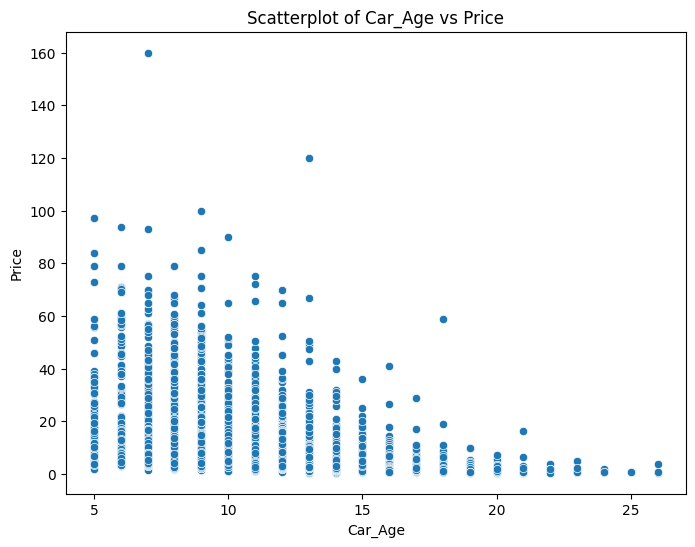

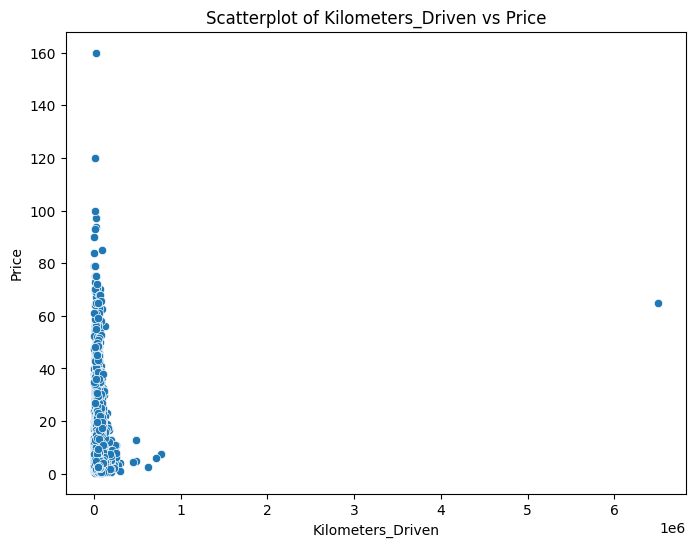

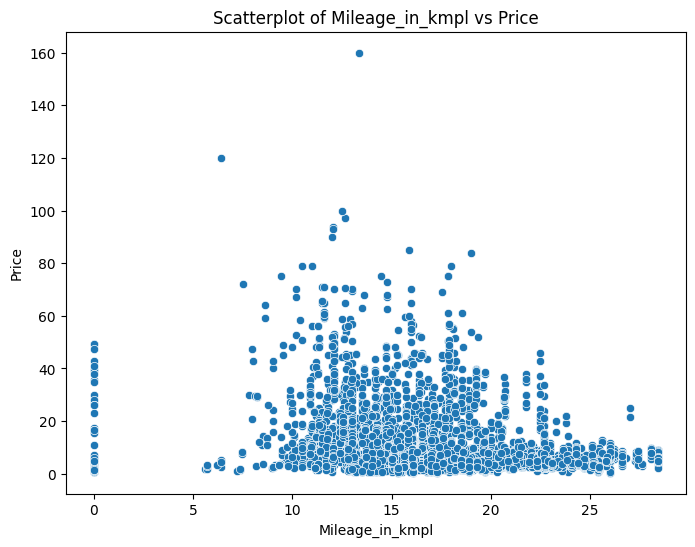

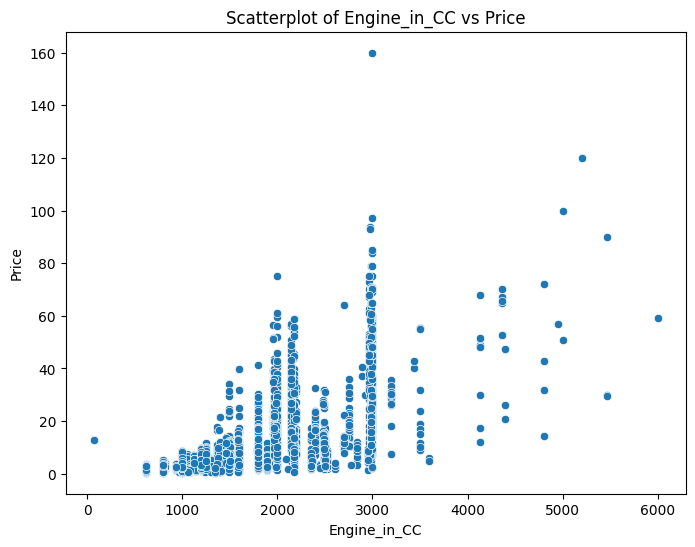

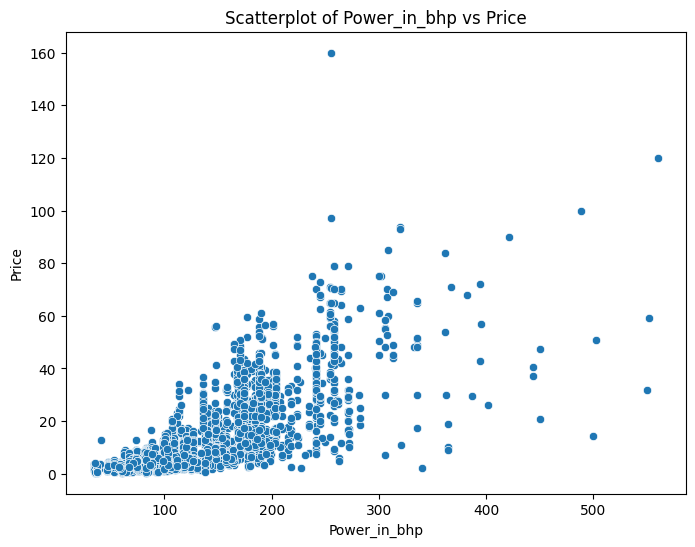

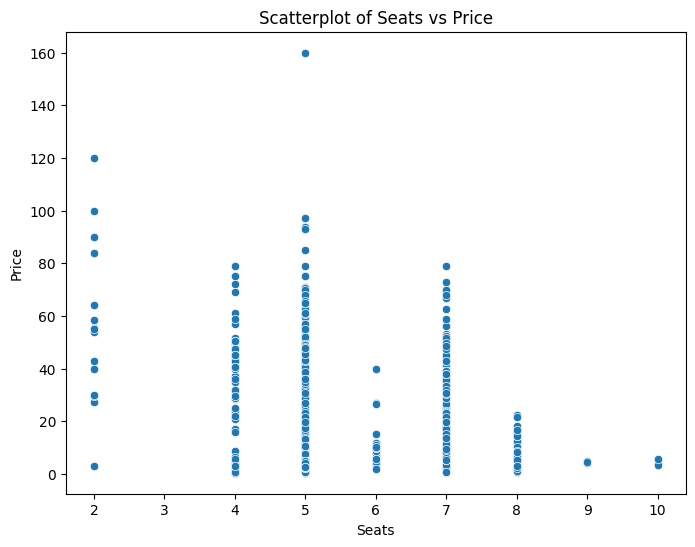

In [ ]:
columns_of_interest = ['Car_Age', 'Kilometers_Driven', 'Mileage_in_kmpl', 'Engine_in_CC', 'Power_in_bhp', 'Seats', 'Price']

# Select the subset of data with the specified columns
subset_df = df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Print correlation coefficients
print("Correlation Coefficients:")
print(correlation_matrix['Price'])

# Create scatter plots against 'Price'
for column in columns_of_interest[:-1]:  # Exclude 'Price' column itself
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=column, y='Price', data=df)
    plt.title(f'Scatterplot of {column} vs Price')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.show()

In [ ]:
df.describe()

,Year,Kilometers_Driven,Mileage_in_kmpl,Engine_in_CC,Power_in_bhp,Seats,Price,Car_Age
count,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7199.000000,6019.000000,7253.000000
mean,2013.365366,5.869906e+04,17.998669,1616.573470,112.765214,5.280456,9.479468,10.634634
std,3.254421,8.442772e+04,4.545639,595.285137,53.493553,0.809327,11.187917,3.254421
min,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,0.440000,5.000000
25%,2011.000000,3.400000e+04,15.100000,1198.000000,75.000000,5.000000,3.500000,8.000000
50%,2014.000000,5.341600e+04,18.060000,1493.000000,94.000000,5.000000,5.640000,10.000000
75%,2016.000000,7.300000e+04,20.920000,1968.000000,138.100000,5.000000,9.950000,13.000000
max,2019.000000,6.500000e+06,28.400000,5998.000000,616.000000,10.000000,160.000000,28.000000


**3. (3 pts) Handling missing values.
There are missing values in the following columns: ‘Mileage’, ‘Engine’, ‘Power’, ‘Seats’, ‘Price’. Please
impute the missing values using subclass (subgroups). As discussed during lecture, categorical or discrete
features use mode and continuous features use mean or median for all samples belonging to the same subclass.
Please justify your choice of mode, mean, or median in each case.**

In [ ]:
df1 = df.copy() #copying the dataframe for better clarity in the 4th question.

In [ ]:
df1['Brand'] = df1.Name.str.split().str.get(0)
df1['Model'] = df1.Name.str.split().str.get(1) + df1.Name.str.split().str.get(2)
df1

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage_in_kmpl,Engine_in_CC,Power_in_bhp,Seats,Price,Car_Age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,11.30,998.0,58.16,5.0,1.75,14,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,9,Hyundai,Creta1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,13,Honda,JazzV
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,12,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,11,Audi,A4New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,13,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,9,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,12,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,11,Volkswagen,PoloGT


As it is evident that columns: mileage_in_kmpl, engine_in_cc, power_in_bhp, seats and price have missing values. The naive solution to is to drop the records, the suggested way is impute these missing values with either mean, median or mode. Columns like seats are categorical columns so imputations are mode. where as columns like mileage, engine, power, price are continous records so mean and median imputations are ideal.  

In [ ]:
columns_with_missing = ['Mileage_in_kmpl', 'Engine_in_CC', 'Power_in_bhp', 'Seats', 'Price']

# Group the data by 'Brand' and 'Model' if they exist in the DataFrame
if 'Brand' in df1.columns and 'Model' in df1.columns:
    grouped = df1.groupby(['Brand', 'Model'])
else:
    print("Error: 'Brand' or 'Model' columns not found in DataFrame")

# Define imputation strategy for each column
imputation_strategy = {
    'Mileage_in_kmpl': 'mean',    # Continuous feature
    'Engine_in_CC': 'mean',     # Continuous feature
    'Power_in_bhp': 'mean',      # Continuous feature
    'Seats': lambda x: x.mode().iloc[0] if not x.mode().empty else None,   # Discrete feature
    'Price': 'median'     # Continuous feature
}

# Aggregate data within each subgroup to calculate mean, mode, or median
aggregated_data = grouped.agg(imputation_strategy)

# Merge aggregated data with original DataFrame to fill missing values
imputed_df = df1.merge(aggregated_data, on=['Brand', 'Model'], suffixes=('', '_imputed'))

# Fill missing values using the aggregated values
for col in columns_with_missing:
    imputed_df[col].fillna(imputed_df[f'{col}_imputed'], inplace=True)
    imputed_df.drop(columns=[f'{col}_imputed'], inplace=True)

# Reset index
imputed_df.reset_index(drop=True, inplace=True)

# Display the imputed DataFrame
print(imputed_df)

                                    Name   Location  Year  Kilometers_Driven  \
0                 Maruti Wagon R LXI CNG     Mumbai  2010              72000   
1               Maruti Wagon R LXI BSIII     Jaipur  2009              83816   
2               Maruti Wagon R VXI BS IV  Bangalore  2016              62000   
3               Maruti Wagon R LXI BS IV       Pune  2011              43874   
4                 Maruti Wagon R LXI CNG       Pune  2013              89900   
...                                  ...        ...   ...                ...   
7247             Nissan Terrano XE 85 PS     Jaipur  2013              54000   
7248            Mercedes-Benz CLA 45 AMG      Kochi  2015              23742   
7249                   Maruti Alto XCITE      Kochi  2011              66287   
7250        Skoda Superb Petrol Ambition      Delhi  2010              40000   
7251  Tata Tiago 1.05 Revotorq XT Option       Pune  2016              41413   

     Fuel_Type Transmission Owner_Type 

In [ ]:
df1.nunique()

Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage_in_kmpl       444
Engine_in_CC          150
Power_in_bhp          383
Seats                   8
Price                1373
Car_Age                23
Brand                  33
Model                 726
dtype: int64

In [ ]:
imputed_df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage_in_kmpl       2
Engine_in_CC         18
Power_in_bhp         63
Seats                23
Price                39
Car_Age               0
Brand                 0
Model                 0
dtype: int64

Since the mileage_in_kmpl has only 2 missing values, imputing with mean or median would not really affect the distribution of the column. Hence, I have imputed the missing values with median as it is robust to outliers.

In [ ]:
mileage_med = imputed_df['Mileage_in_kmpl'].median()
imputed_df['Mileage_in_kmpl'].fillna(mileage_med, inplace = True)

In [ ]:
imputed_df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage_in_kmpl       0
Engine_in_CC         18
Power_in_bhp         63
Seats                23
Price                39
Car_Age               0
Brand                 0
Model                 0
dtype: int64

since engine_in_cc has about 18 outliers which makes the distribution close to normal (gaussian). When the distribution is normal in such cases one must impute the missing values with mean of that column.

In [ ]:
Engine_mean = imputed_df['Engine_in_CC'].mean()
imputed_df['Engine_in_CC'].fillna(Engine_mean, inplace = True)

In [ ]:
imputed_df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage_in_kmpl       0
Engine_in_CC          0
Power_in_bhp         63
Seats                23
Price                39
Car_Age               0
Brand                 0
Model                 0
dtype: int64

The power_in_bhp has about 63 outliers. Just by visual inspection we can see that the power column is not normally distributed (referring the boxplot from the last question). hence the imputation is going to median value imputation.

In [ ]:
power_med = imputed_df['Power_in_bhp'].median()
imputed_df['Power_in_bhp'].fillna(power_med, inplace = True)

In [ ]:
imputed_df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage_in_kmpl       0
Engine_in_CC          0
Power_in_bhp          0
Seats                23
Price                39
Car_Age               0
Brand                 0
Model                 0
dtype: int64

The seats column has 23 missing values, so here imputation methods would significantly affect the distribution of the curve. Before employing any imputation methods we must check the distribution of the price column

In [ ]:
seats_mode = imputed_df['Seats'].mode()
imputed_df['Seats'].fillna(seats_mode, inplace = True)

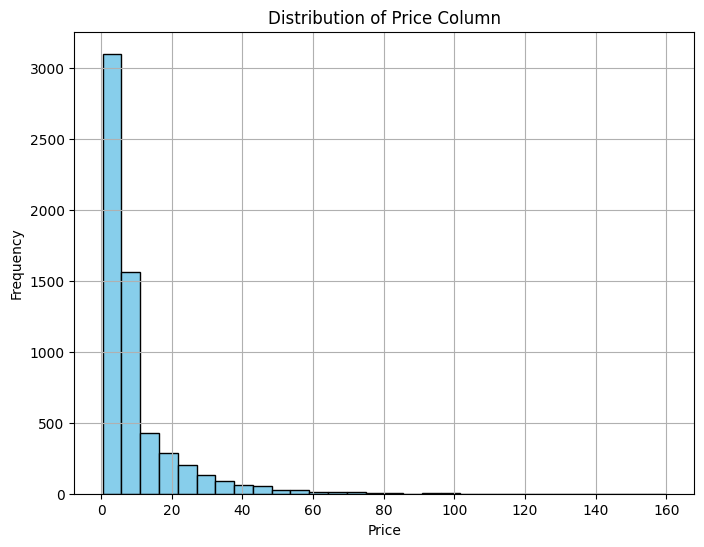

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Price Column')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

As it is evident, the curve of the price column isn't normally distributed, so the better imputation without affecting the distribution is the median imputation.

In [ ]:
price_med = df1['Price'].median()
df1['Price'].fillna(price_med, inplace = True)

In [ ]:
df1.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage_in_kmpl        2
Engine_in_CC          46
Power_in_bhp         175
Seats                 54
Price                  0
Car_Age                0
Brand                  0
Model                  1
dtype: int64

**4. (2 pts) Outliers and Correlation with the imputed data points.
Please repeat #2 with the imputed data points. The resulting plots should contain both original and imputed data
points in different colors to distinguish one from the other; please use a clear legend in each plot.
Please describe/summarize your observations with respect to data distribution, outliers, and correlation after
imputation**


First let plot the correlation plots with the imputed values which are in **imputed_df**.

Correlation Coefficients:
Car_Age             -0.292497
Kilometers_Driven   -0.015906
Mileage_in_kmpl     -0.291643
Engine_in_CC         0.658968
Power_in_bhp         0.777811
Seats                0.053689
Price                1.000000
Name: Price, dtype: float64


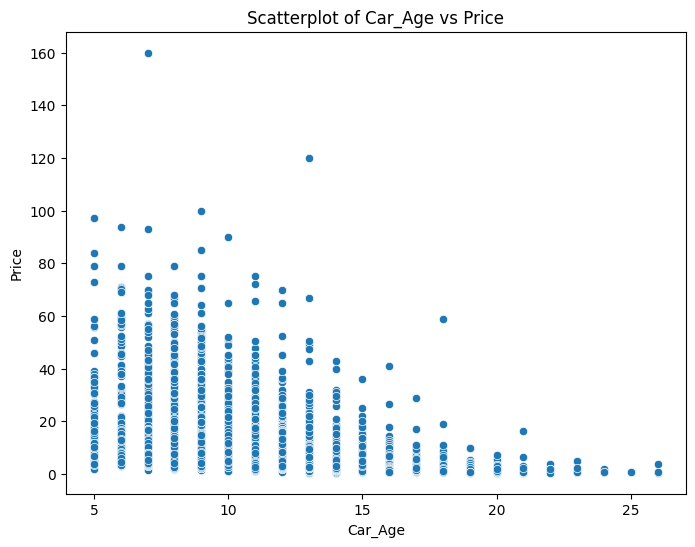

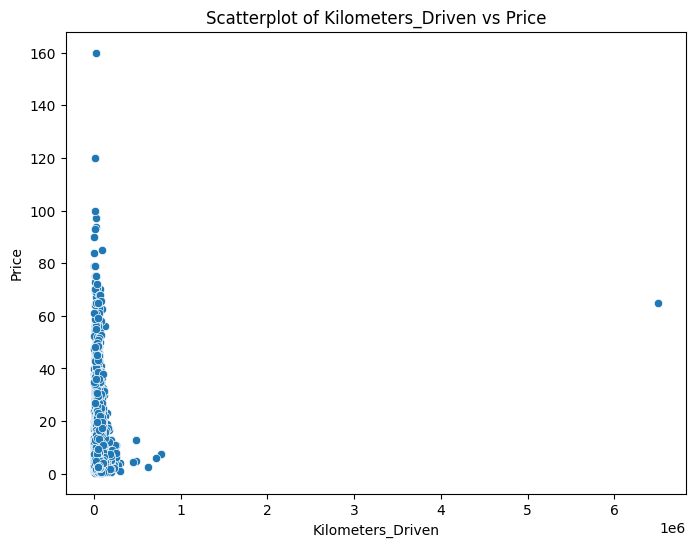

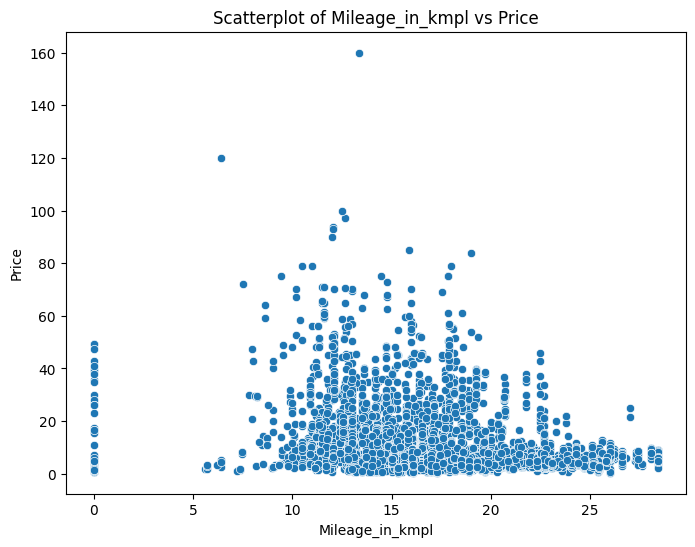

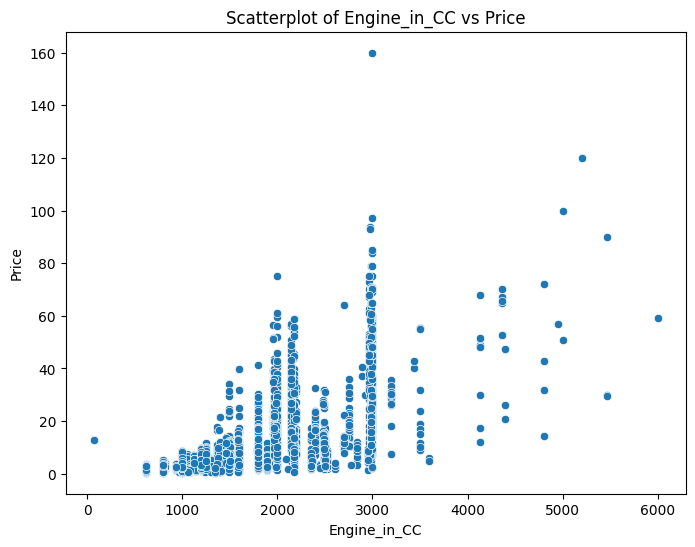

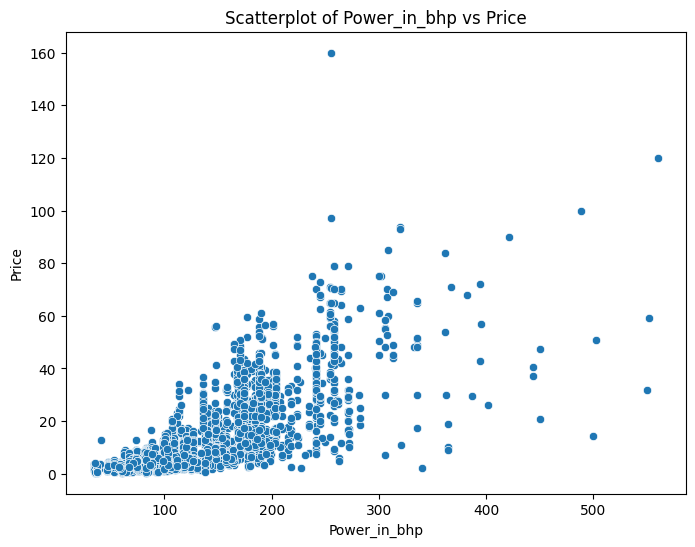

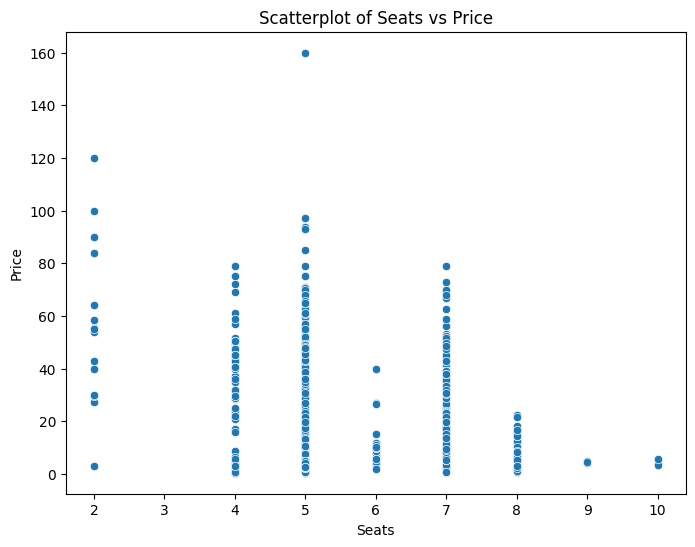

In [ ]:
columns_of_interest = ['Car_Age', 'Kilometers_Driven', 'Mileage_in_kmpl', 'Engine_in_CC', 'Power_in_bhp', 'Seats', 'Price']

# Select the subset of data with the specified columns
subset_df1 = imputed_df[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = subset_df1.corr()

# Print correlation coefficients
print("Correlation Coefficients:")
print(correlation_matrix['Price'])

# Create scatter plots against 'Price'
for column in columns_of_interest[:-1]:  # Exclude 'Price' column itself
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=column, y='Price', data=df)
    plt.title(f'Scatterplot of {column} vs Price')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.show()

By visual inspection it seems like the correlation plots have not changed after and before missing value imputation.

Let's inspect the boxplots of both the dataframes.

<ipython-input-51-2db320029c37>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Type', y=column, data=df_combined, palette=palette, legend=True)


Number of outliers in 'Car_Age' for Original data: 58
Number of outliers in 'Car_Age' for Imputed data: 58


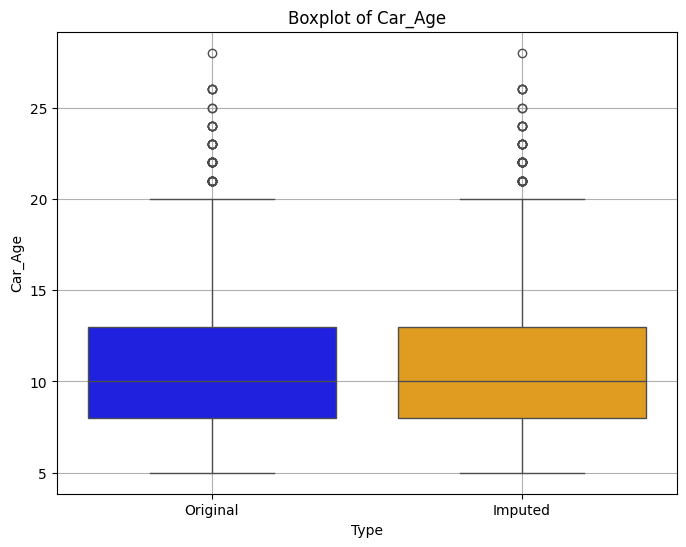

<ipython-input-51-2db320029c37>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Type', y=column, data=df_combined, palette=palette, legend=True)


Number of outliers in 'Kilometers_Driven' for Original data: 258
Number of outliers in 'Kilometers_Driven' for Imputed data: 258


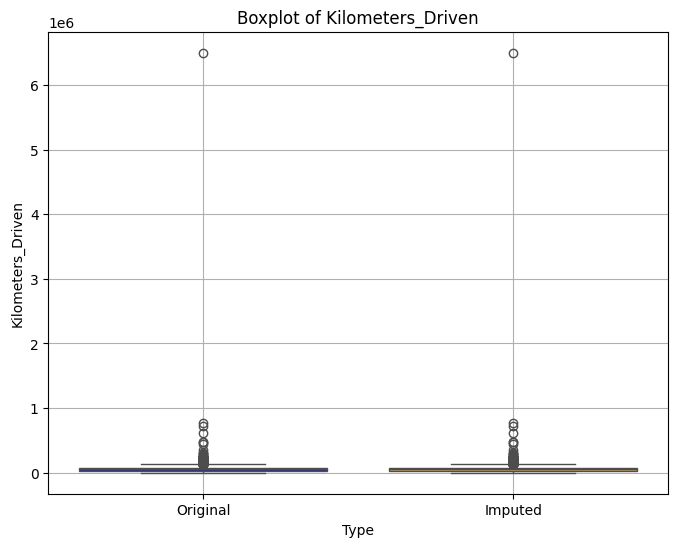

<ipython-input-51-2db320029c37>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Type', y=column, data=df_combined, palette=palette, legend=True)


Number of outliers in 'Mileage_in_kmpl' for Original data: 88
Number of outliers in 'Mileage_in_kmpl' for Imputed data: 88


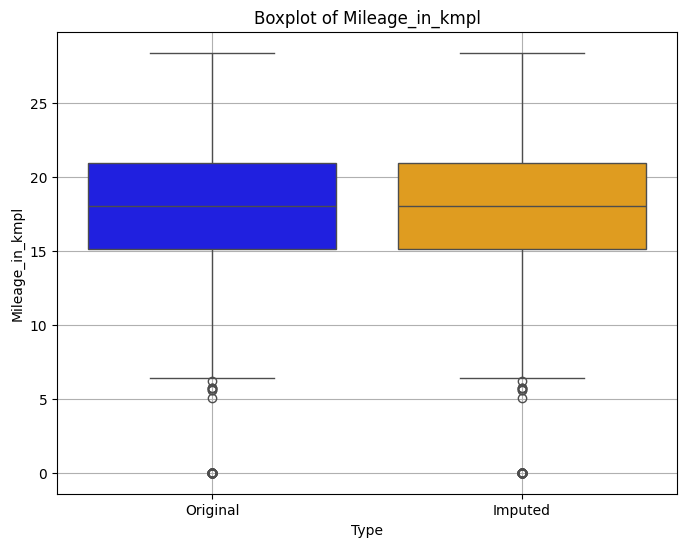

<ipython-input-51-2db320029c37>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Type', y=column, data=df_combined, palette=palette, legend=True)


Number of outliers in 'Engine_in_CC' for Original data: 65
Number of outliers in 'Engine_in_CC' for Imputed data: 65


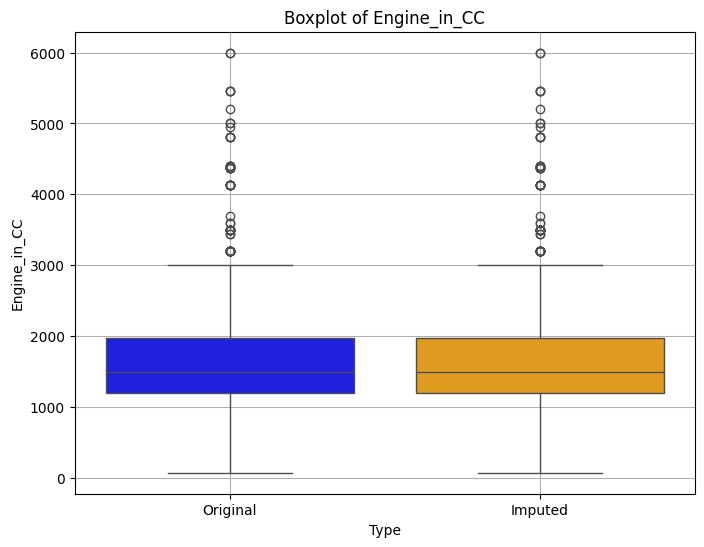

<ipython-input-51-2db320029c37>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Type', y=column, data=df_combined, palette=palette, legend=True)


Number of outliers in 'Power_in_bhp' for Original data: 273
Number of outliers in 'Power_in_bhp' for Imputed data: 273


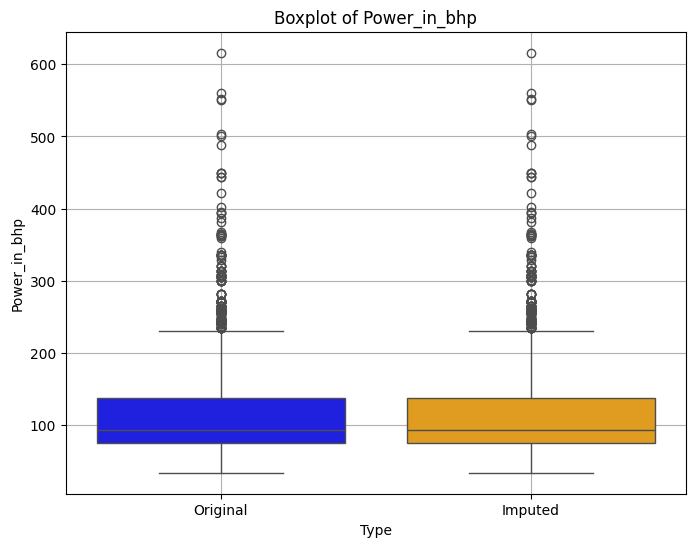

<ipython-input-51-2db320029c37>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Type', y=column, data=df_combined, palette=palette, legend=True)


Number of outliers in 'Seats' for Original data: 7199
Number of outliers in 'Seats' for Imputed data: 7199


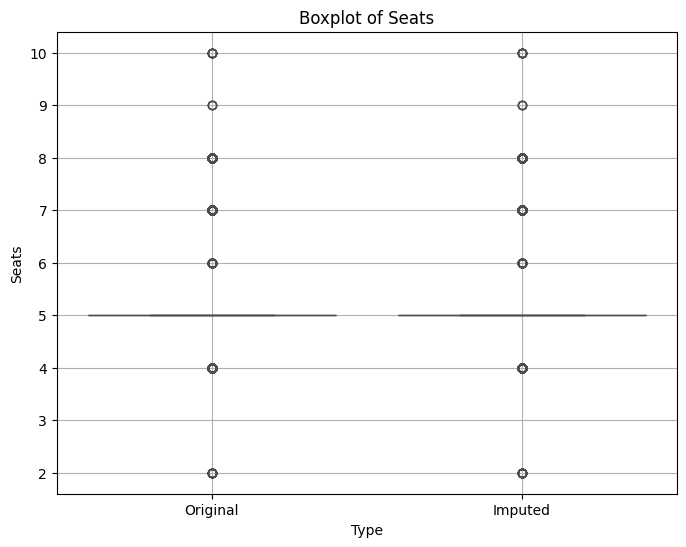

<ipython-input-51-2db320029c37>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Type', y=column, data=df_combined, palette=palette, legend=True)


Number of outliers in 'Price' for Original data: 718
Number of outliers in 'Price' for Imputed data: 982


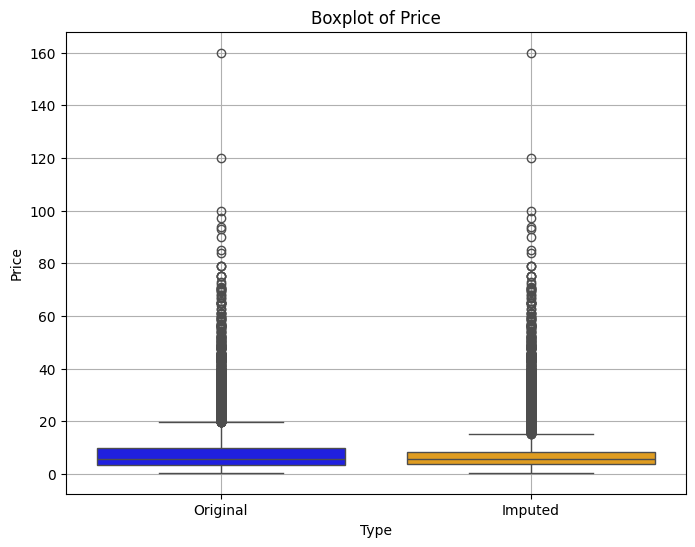

In [ ]:
# Function to detect outliers based on IQR
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    if lower_bound <= min(column):
        lower_bound = min(column)
        outliers = column[(column < lower_bound) | (column > upper_bound)]
    elif upper_bound >= max(column):
        upper_bound = max(column)
        outliers = column[(column < lower_bound) | (column > upper_bound)]
    else:
        outliers = column[(column <= lower_bound) | (column >= upper_bound)]
    return outliers

df['Type'] = 'Original'
df1['Type'] = 'Imputed'

# Concatenate the dataframes and reset index
df_combined = pd.concat([df, df1]).reset_index(drop=True)

# List of column names
columns_of_interest = ['Car_Age', 'Kilometers_Driven', 'Mileage_in_kmpl', 'Engine_in_CC', 'Power_in_bhp', 'Seats', 'Price']

# Define color palette for the 'Type' column
palette = {'Original': 'blue', 'Imputed': 'orange'}

# Plot combined boxplots for each column with different colors for the different types
for column in columns_of_interest:
    plt.figure(figsize=(8, 6))

    # Plot boxplots
    ax = sns.boxplot(x='Type', y=column, data=df_combined, palette=palette, legend=True)

    # Calculate outliers for Original and Imputed data
    outliers_original = detect_outliers(df_combined[df_combined['Type'] == 'Original'][column])
    outliers_imputed = detect_outliers(df_combined[df_combined['Type'] == 'Imputed'][column])

    # Print the number of outliers
    print(f"Number of outliers in '{column}' for Original data: {len(outliers_original)}")
    print(f"Number of outliers in '{column}' for Imputed data: {len(outliers_imputed)}")

    plt.title(f'Boxplot of {column}')
    plt.xlabel('Type')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

In [ ]:
imputed_df.describe()

,Year,Kilometers_Driven,Mileage_in_kmpl,Engine_in_CC,Power_in_bhp,Seats,Price,Car_Age
count,7252.000000,7.252000e+03,7252.000000,7252.000000,7252.000000,7229.000000,7213.000000,7252.000000
mean,2013.366520,5.870026e+04,17.999210,1616.843121,112.192856,5.279845,9.330785,10.633480
std,3.253162,8.443348e+04,4.545106,594.632474,53.248506,0.808340,10.822435,3.253162
min,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,0.440000,5.000000
25%,2011.000000,3.400000e+04,15.100000,1198.000000,74.675000,5.000000,3.500000,8.000000
50%,2014.000000,5.342900e+04,18.060000,1493.000000,93.700000,5.000000,5.500000,10.000000
75%,2016.000000,7.300000e+04,20.920000,1968.000000,138.030000,5.000000,9.750000,13.000000
max,2019.000000,6.500000e+06,28.400000,5998.000000,616.000000,10.000000,160.000000,28.000000


Only by visual inspection the boxplots for both, original and imputed values don't seem to have changed the boxplots expect the mean and standard deviation have changed, this is mostly because of the imputation methodologies employed for imputing missing values. Better imputation methodologies is using KNN clusters.  